In [2]:
import pandas
import numpy 
import matplotlib

df =  pandas.read_csv("data/faithful.csv")
print(df)



     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


(1a)

Text(0, 0.5, 'Waiting Time (minutes)')

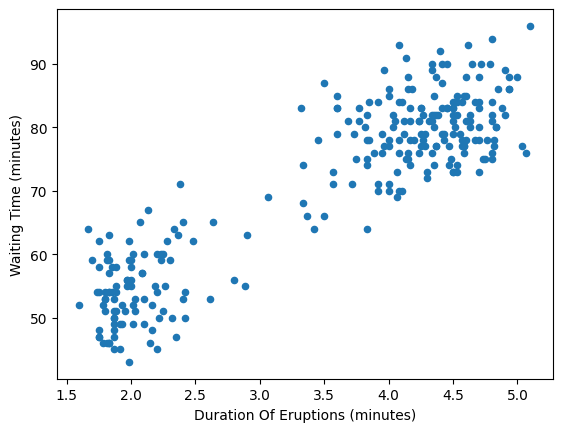

In [21]:


df_scatter = df.plot.scatter(x ="eruptions", y= "waiting")
df_scatter.set_xlabel("Duration Of Eruptions (minutes)")
df_scatter.set_ylabel("Waiting Time (minutes)")

Yes, I definetly do think there is a relationship between waiting time and eruption time, as the duration of eruptioins increased the waiting time between also increased

(1b)